In [99]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
import hvplot.pandas

%matplotlib inline

In [100]:
# Load .env environment variables
load_dotenv()

True

In [101]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [102]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [103]:
# Format start and end dates as ISO format for our bond indices
tickers = ['AGG', 'TIP', 'SHY', 'TLT', 'VNQ', 'XLE']
start_date = pd.Timestamp("1990-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-20", tz="America/New_York").isoformat()

bond_index_portfolio = alpaca.get_bars(
    tickers,
    timeframe="1Day",
    start = start_date,
    end = end_date
).df

In [104]:
# sets the index as a dateformat
bond_index_portfolio.index = bond_index_portfolio.index.date
bond_index_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2015-12-01,108.54,108.8400,108.43,108.82,4259986,15562,108.754152,AGG
2015-12-02,108.73,108.7799,108.61,108.67,2462787,11581,108.684692,AGG
2015-12-03,108.41,108.4100,107.81,107.89,4634020,16801,108.040315,AGG
2015-12-04,108.05,108.3000,108.00,108.24,2182057,9796,108.192232,AGG
2015-12-07,108.30,108.5800,108.23,108.40,2143773,9104,108.460067,AGG


In [105]:
#reformats the data
bond_index_portfolio = bond_index_portfolio.drop(columns=['open','high','low','volume','trade_count','vwap'])
AGG_closes = bond_index_portfolio[bond_index_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
TIP_closes = bond_index_portfolio[bond_index_portfolio['symbol']=='TIP'].drop('symbol', axis=1)
SHY_closes = bond_index_portfolio[bond_index_portfolio['symbol']=='SHY'].drop('symbol', axis=1)
TLT_closes = bond_index_portfolio[bond_index_portfolio['symbol']=='TLT'].drop('symbol', axis=1)
VNQ_closes = bond_index_portfolio[bond_index_portfolio['symbol']=='VNQ'].drop('symbol', axis=1)
XLE_closes = bond_index_portfolio[bond_index_portfolio['symbol']=='XLE'].drop('symbol', axis=1)
bond_index_portfolio_close = pd.concat([AGG_closes, TIP_closes, SHY_closes, TLT_closes,
VNQ_closes, XLE_closes],axis=1, keys=['AGG', 'TIP', 'SHY', 'TLT', 'VNQ', 'XLE'])

bond_index_all = pd.DataFrame()
bond_index_all["AGG"] = bond_index_portfolio_close["AGG"]["close"]
bond_index_all["TIP"] = bond_index_portfolio_close["TIP"]["close"]
bond_index_all["SHY"] = bond_index_portfolio_close["SHY"]["close"]
bond_index_all["TLT"] = bond_index_portfolio_close["TLT"]["close"]
bond_index_all["VNQ"] = bond_index_portfolio_close["VNQ"]["close"]
bond_index_all["XLE"] = bond_index_portfolio_close["XLE"]["close"]
bond_index_all.head()



,AGG,TIP,SHY,TLT,VNQ,XLE
2015-12-01,108.82,111.21,84.58,122.83,80.49,68.56
2015-12-02,108.67,110.83,84.51,122.87,78.85,66.44
2015-12-03,107.89,110.14,84.51,119.54,77.61,65.11
2015-12-04,108.24,110.42,84.53,120.58,79.08,64.74
2015-12-07,108.40,110.38,84.52,121.75,78.85,62.26


In [ ]:
#csvpath = Path('C:/Users/15613/FinTechWork/FinTechProject1/BondIndexData.csv')
#bond_index_all.to_csv(csvpath)

In [ ]:
#creates a selection widget
bond_tickers = pn.widgets.MultiChoice(name="Security List", value=['AGG'],
    options=tickers, height=500)
bond_tickers


In [ ]:
#creates a new dataframe from the widget selection
from IPython.display import display
import ipywidgets as ipw
button = pn.widgets.Button(name='Run', button_type='primary')
layout = ipw.HBox(get_data=[button, bond_tickers])


def make_bond_plot(btn_object):
    bond_index_all[bond_tickers.value].hvplot(label='Bond Index Data')
    bond_index_all[bond_tickers.value].describe().format(btn_object.description)

button.on_click(make_bond_plot)
pn.panel(layout)
#bond_stats = bond_index_all[bond_tickers.value].describe()

#column = pn.Column(
#    button,
#    bond_tickers, 
#    bond_plot,
#    bond_stats
#    )
#column
#button.on_click(pn.Column(bond_tickers,
#bond_plot,
#bond_stats
#))
#button


In [115]:
button2 = pn.widgets.Button(name='Run Test', button_type='primary')
column1 = pn.Column(button2, bond_tickers, height=500,)

def button_click(tickers):
    bond_plot = bond_index_all[bond_tickers.value].hvplot(label='Bond Index Data')
    #bond_stats = bond_index_all[bond_tickers.value].describe()
    column = pn.Column(bond_plot)
    return column.show()
button2.on_click(button_click)
column1.show()




Launching server at http://localhost:53176


In [ ]:
from empyrial import empyrial, Engine, oracle   


In [ ]:
bond_tickers2 = bond_tickers.value
tickers2 = ['AGG', 'TIP', 'SHY', 'TLT', 'VNQ']
portfolio = Engine(
    start_date = "1990-01-01",
    portfolio= bond_tickers2,
    weights= [0.2, 0.2, 0.2, 0.2, 0.2],
    benchmark= ["SPY"]
)

empyrial(portfolio, rf=2.0, confidence_value=0.95)

In [95]:
df = pd.DataFrame({
    'Securities': [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,
    None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,
    None,None,None,None,None],
    'Weightings' : [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,
    0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,
    0.00,0.00,0.00,0.00,0.00,]
})
button = pn.widgets.Button(name='Run Test', button_type='primary')
df_widget = pn.widgets.Tabulator(df, buttons={'Print': "<i class='fa fa-print'></i>"})
column = pn.Column(button, df_widget)
column.show()

#'Securities': ["Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty",
#    "Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty",
#    "Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty",
#    "Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty","Empty"]

#'Weightings' : [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
#    ,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,
#    0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00]

Launching server at http://localhost:55027


In [93]:
securities_df = []
weightings_df = []
df_inputs = df_widget.value

for idx, row in df_inputs.iterrows():
    if df_inputs.loc[idx,'Securities'] !='NaN' or df_inputs.loc[idx,'Securities'] == '':
        securities_df.append(df_inputs.loc[idx,'Securities'])
        weightings_df.append(df_inputs.loc[idx,'Weightings'])

securities_df


['AAPL', 'XOM', 'JPM', 'GOOG']

Start date: 1990-01-01
End date: 2022-04-25


,Backtest
,
Annual return,17.49%
Cumulative return,18154.41%
Annual volatility,22.27 %
Winning day ratio,53.08%
Sharpe ratio,-4.11
Calmar ratio,0.35
Information ratio,0.0
Stability,0.98
Max Drawdown,-49.53 %


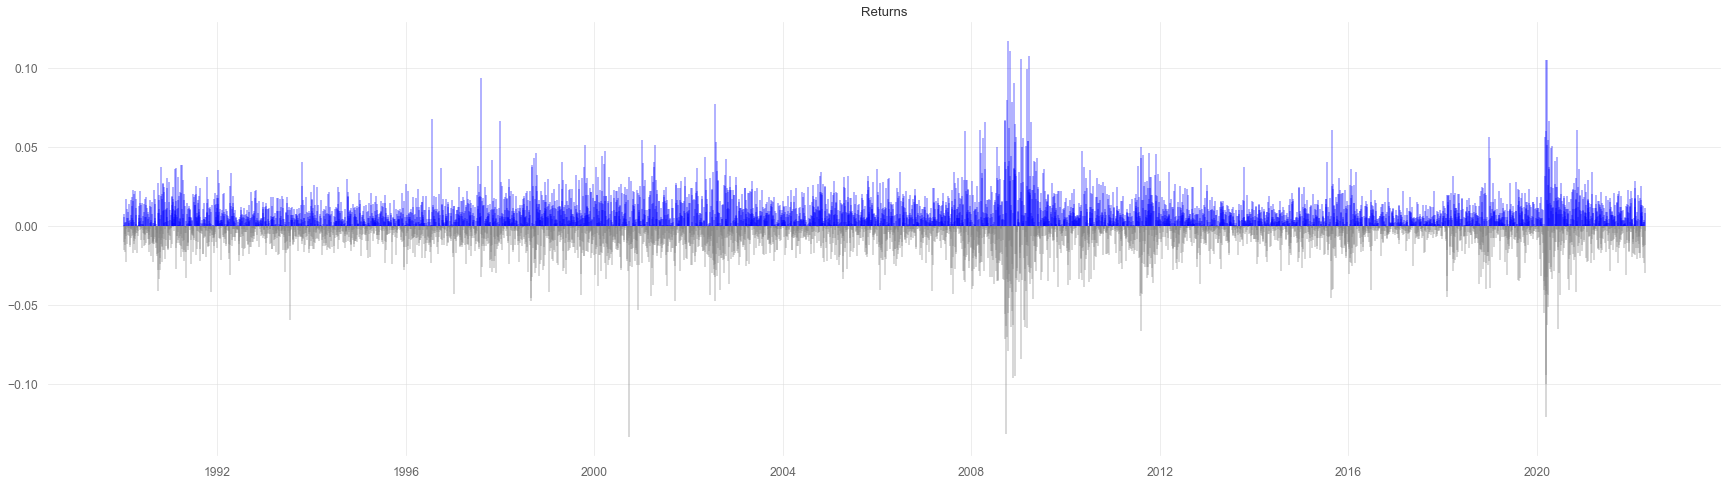

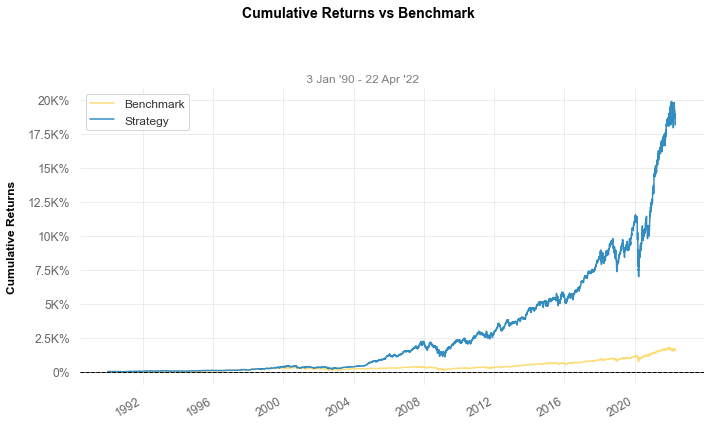

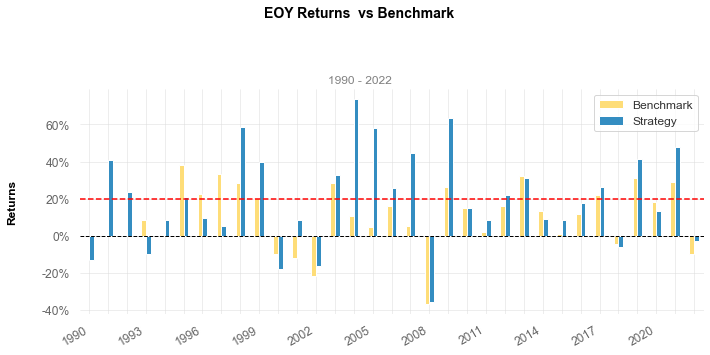

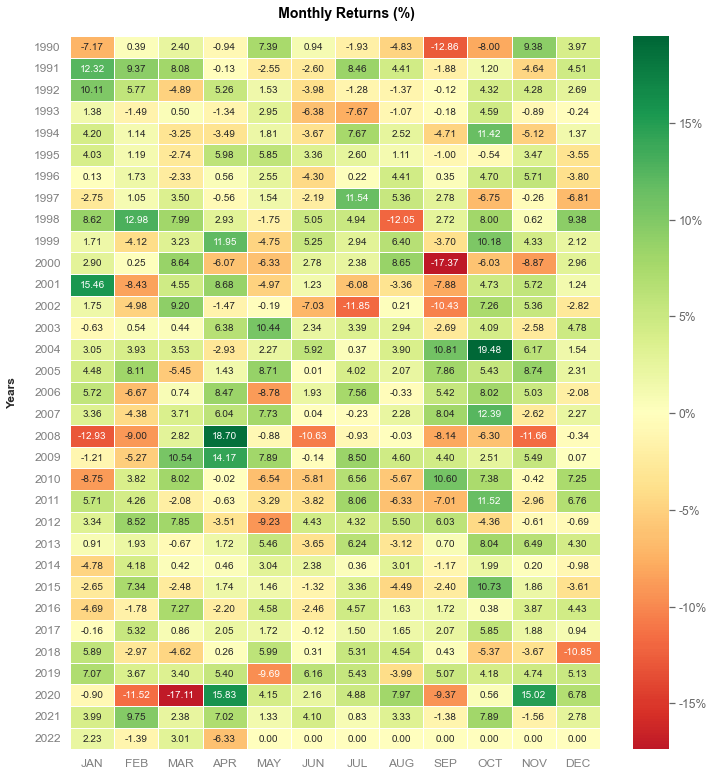

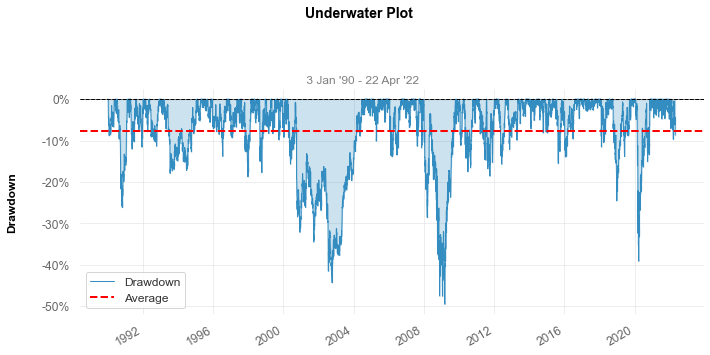

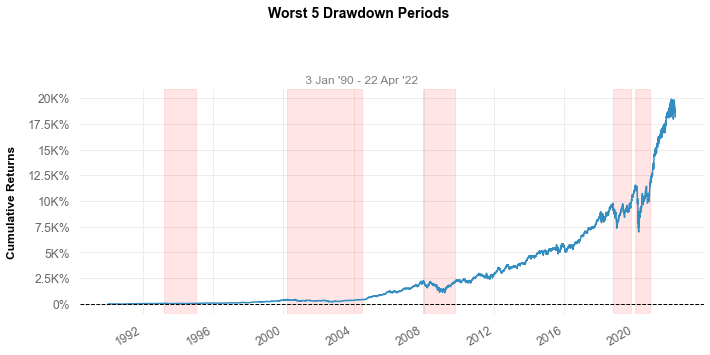

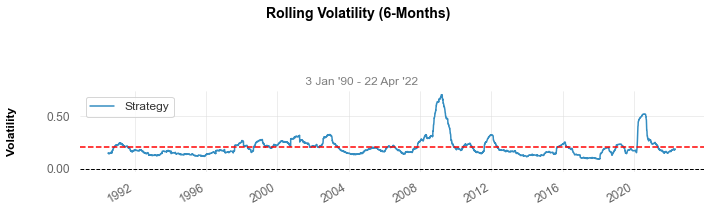

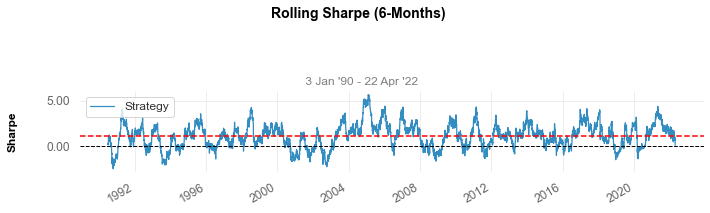

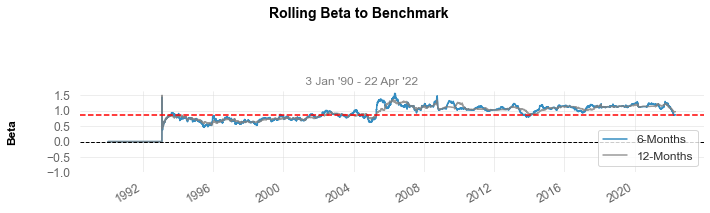

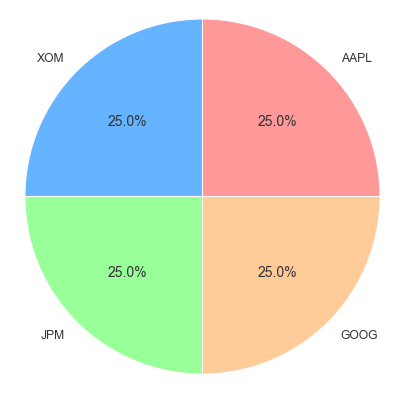

AttributeError: 'tuple' object has no attribute 'show'

In [96]:
portfolio = Engine(
    start_date = "1990-01-01",
    portfolio= securities_df,
    weights= weightings_df,
    benchmark= ["SPY"]
)

empyrial(portfolio, rf=2.0, confidence_value=0.95)

In [98]:
#text = pn.widgets.TextInput(value='Ready')

#def b(event):
#    text.value = 'Clicked {0} times'.format(button.clicks)
    
#button.on_click(b)
#pn.Row(button, text).show()

Launching server at http://localhost:65363
